# Building a Convolutional Neural Network with Keras Sequential API

by Emil Vassev

November 7-9, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Convolutional Neural Networks (CNN)

* provide a network architecture for deep learning that learns directly from images
* have at least one convolution(al) layer
* made up of several layers – process and transform image inputs to produce an output:
    * take in an input image
    * assign importance (learnable weights and biases) to various objects in the image
    * differentiate objects
* can be trained to do image analysis tasks:
    * scene classification 
    * object detection and segmentation
    * image processing

### Generic Architecture

<div>
 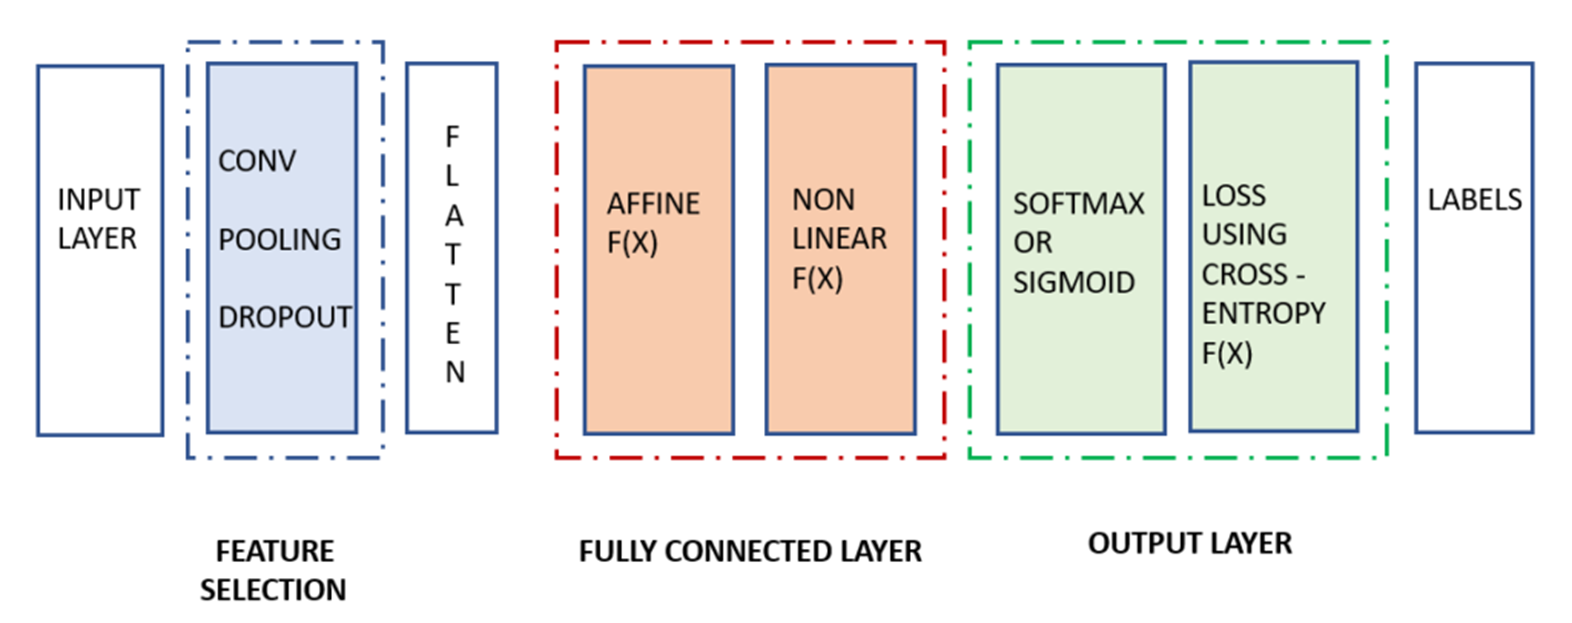
</div

* inspired by the organization of the Visual Cortex
* Three main layers: **Convolutional Layer**, **Pooling Layer**, and **Fully Connected Layer**

* **Convolutional Layer** - extracts the various features from the input images (feature map)
  * the first layer in CNN
  * used to extract various features from the input images
  * the mathematical operation of convolution is performed between the input image and a filter (kernel) of a particular size, e.g.,  MxM:
    * by sliding the filter over the input image, the dot product is taken between the filter and the parts of the input image with respect to the size of the filter
    * the output is a Feature map - gives us information about the image such as the corners and edges
  
<div>
 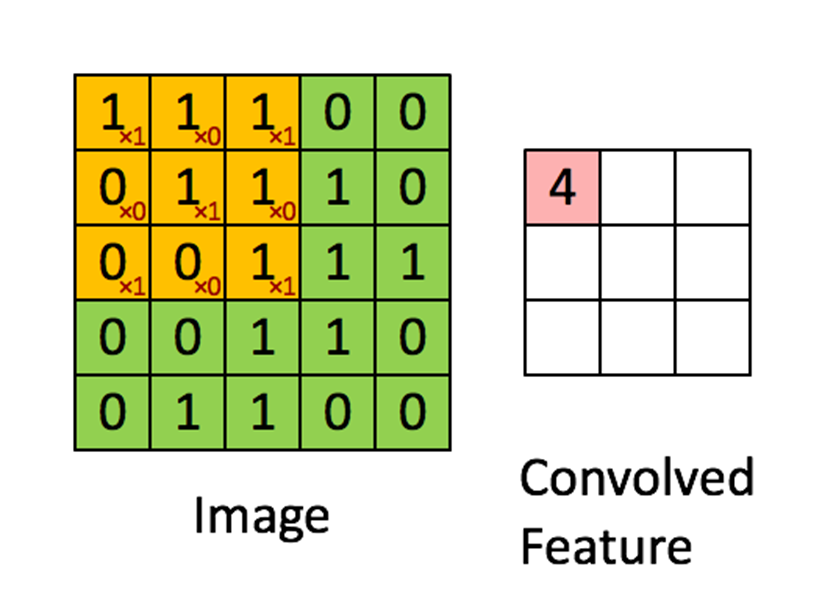
</div

* **Pooling Layer** 
  * usually serves as a bridge between the Convolutional Layer and the FC Layer
  * decreases the size of the convolved feature map to reduce the computational costs
  * types of Pooling operations (summarize the features generated by a convolutional layer):
    * Max Pooling - the largest element is taken from feature map
    * Average Pooling - calculates the average of the elements in a predefined sized Image section
    * Sum Pooling - the total sum of the elements in the predefined section is computed

<div>
 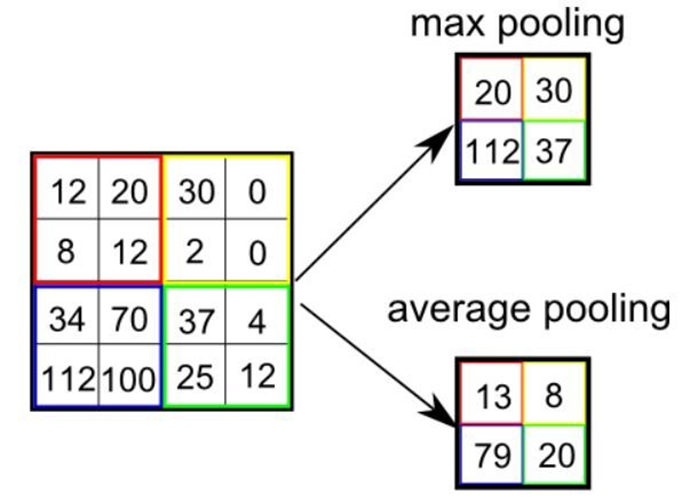
</div

* **Fully Connected Layer**:
  * takes the end result of the convolution/pooling process and reaches a classification decision
  * consists of the weights and biases along with the neurons:
    * the part of CNN, which is considered as an ANN for classification tasks (feed-forward ANN)
    * takes the inputs from the feature analysis and applies weights to predict the correct label
    * combination of Affine function and Non-Linear function:
      * each neuron applies a linear transformation to the input vector through a weights matrix
      * a non-linear transformation is then applied to the product through a non-linear activation function
      * **affine function**: $y = f(Wx + b)$ - dot product between the weights matrix $W$ and the input vector $x$
      * **non-linear activation function**: Sigmoid, TanH and ReLu  

<div>
 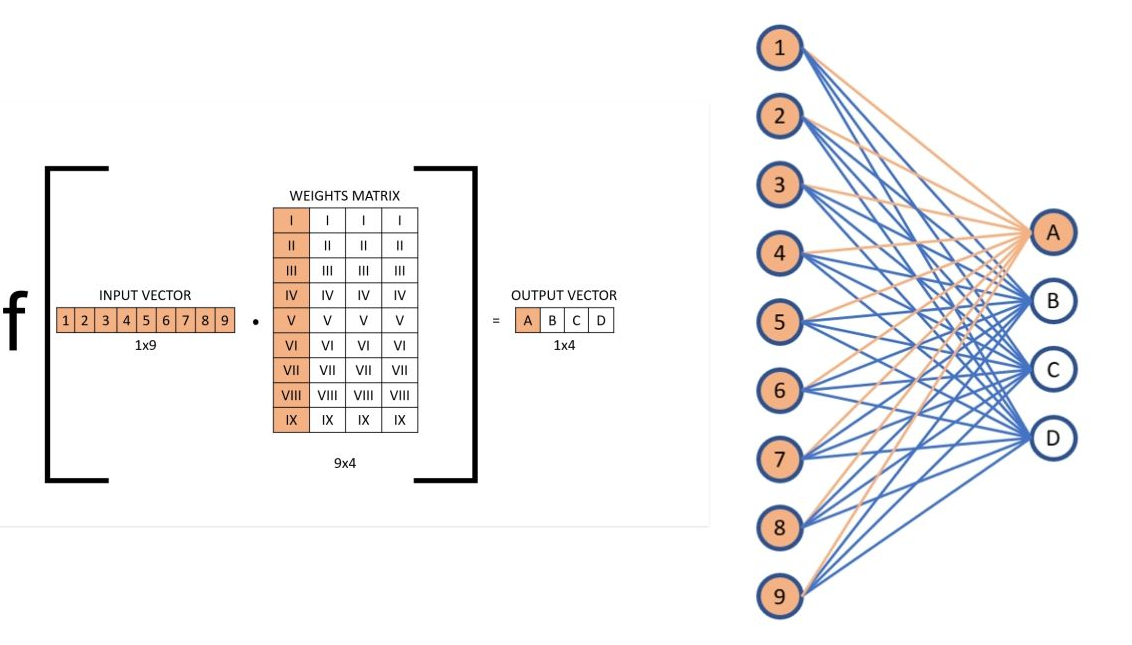
</div

* additional layers:
    * **Input Layer**
    * **Dropout Layer** -  is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others
    * **Flatten Layer** - one-dimensional layer that flattens feature maps into a vector
    * **Output Layer** -  prepares the classification output:
        * **Softmax or Sigmoid Layer**:
            * takes vectors of real numbers as input (the result of the Fully Connected Layer)
            * normalizes the vectors into a probability distribution (proportional to the exponentials of the input numbers) - after applying Softmax, each element will can be interpreted as a probability distribution
        * **Loss Calculation Layer**: uses Cross-entropy function to compare the target and predicted output values (the probability distributions comming from the Softmax Layer)  
     * **Labels Layer** - labels the final calculation of classes - uses the list of all classes with probability associated with each class and the class with the highest probability is the final class of the input image

## Using Keras API to Build CNNs

Steps:
1. Instantiate a sequential model using the Sequential class.
2. Build convolutional layers with the Conv2D class.
3. Build pooling layers with the MaxPooling2D class.
4. Build a Flatten Layer as a connector between te last Pooling Layer and the first Fully Connected Layer.
5. Build fully connected layers with the Dense class.
6. Add the convolutional, pooling, flatten and dense layers using the add() method.
7. Compile the CNN model by using the compile() method.
8. Train the CNN model by using the fit() method.
9. Evaluate the CNN model by using the evaluate() method.
10. Test the CNN model by using the predict() method.
11. Get the summary info about the entire CNN architecture with the summary() method.

### Keras Conv2D class

In Keras, a convolutional layer is referred to as a Conv2D layer.

Each convolutional layer in a CNN is created using the Conv2D class that simply performs the convolution operation in a two-dimensional space. The movement of the filter happens on the input image across a two-dimensional space.

```python
from tensorflow.keras.layers import Conv2D

Conv2D ( filters, kernel_size, strides, 
         activation, input_shape
       )
```

#### Important Parameters:
* **filters**: The number of filters (integer number). The number of filters can be increased with each convolutional layer, e.g.,  16, 32, 64, 128, etc.
* **kernel_size**: Specifies the height and width of the kernel (convolution, or filter) window. This takes an integer or a tuple of two integers, e.g., (3, 3). In most cases, the window is a square with the same height and width. 
* **strides**: The **number of steps (pixels) that we move the filter over the input image. This takes a tuple for the strides along the height and width. If the height and width are the same, we can use an integer. The default is set to (1, 1).                              
* **activation**: The type of activation function to use in the convolutional layer. The default is no activation that is equivalent to the linear or identity activation. We usually use the 'relu' activation function in each convolutional layer.
* **input_shape**: Specify the height, width and depth of the input as a tuple of integers. In other words, this is the size of the input image. It is mandatory to specify this argument in the first convolutional layer if it is the first layer in the model immediately after the input layer. This argument is not included in other intermediate convolutional layers...

**Note**: When the input_shape is passed to the first convolutional layer, Keras adds an input layer for the model behind the scene and we do not need to specify the input layer explicitly.
```python
conv_layer = Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', input_shape=(28,28,1))

model.add(conv_layer)
```

### Keras MaxPooling2D class

After creating the convolutional layer, the next step is to create the pooling layer. Convolution and pooling layers are used together as pairs. There are two types of pooling operations: Max pooling and Average pooling. Here, we use Max pooling. Consult the Keras documentation for other supported pooling classes: https://keras.io/api/layers/pooling_layers/ 

Each pooling layer in a CNN is created using the MaxPooling2D()class that simply performs the Max pooling operation in a two-dimensional space.

In Keras, a Max pooling layer is referred to as a MaxPooling2D layer.
```python
from tensorflow.keras.layers import MaxPooling2D
MaxPooling2D(pool_size, strides)
```
#### Important Parameters
* **pool_size**: The size of the pooling window. The default is (2, 2). This takes an integer or a tuple. The same window length will be used for both dimensions if we use an integer.
* **strides**: The number of steps (pixels) that we move the pooling window over the feature map for each pooling step. This takes a tuple for the strides along the height and width. If the height and width are the same, we can use an integer. The default is set to Nonethat takes the value of pool_size.

```python
pool_layer = MaxPool2D(pool_size=(2,2))
model.add(pool_layer)
```

### Keras Dense Class
The final layers in a CNN are Fully Connected layers (referred to as a Dense layers in Keras). In Keras, these layers are created using the Dense class.

```python
from tensorflow.keras.layers import Dense
Dense(units, activation)
```

#### Important Parameters
* **units**: The number of nodes (units) in the layer. This is a required argument and takes a positive integer.
* **activation**: The type of activation function to use in the layer. The default is None, which means no activation (i. e., linear or identity activation).

### Keras Flatten Class

The Flattened Layer lays between the final Pooling Layer and the first Fully Connected Layer. This layer performs flattening of the resulted matrix, and in Keras, this is done by using the **flatten** class.

### Implementation

#### Step #1: Prepare Dataset
We use the MNIST dataset provided by Keras. This is a dataset of 60 000, 28x28 grayscale images of the 10 digits, along with an additional test dataset of 10 000 images.

In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist

In [2]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The result of the mnist.load_data() is two tuples of NumPy arrays: (X_train, y_train), (X_test, y_test). 

* **X_train**: a NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data -  pixel values range from 0 to 255
* **y_train**: a NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data
* **X_test**: a NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data - pixel values range from 0 to 255
* **y_test**: a NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data

To use this data we need to extract the different portions of the two tuples.

In [3]:
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


We need to normalize the images, i.e., scale the pixel values to the range 0-1.

In [4]:
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

Let's see a few image examples along with their labels.

In [5]:
import matplotlib.pyplot as plt

The label of this image is 5


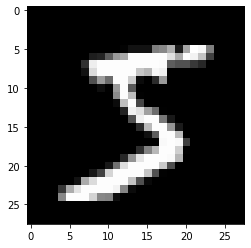

In [6]:
print("The label of this image is " + str(y_train[0]))

# plot the image
plotData = X_train[0]
plt.gray() 
plt.imshow(plotData)
plt.show()

The label of this image is 0


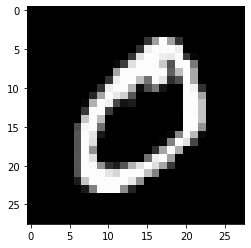

In [7]:
print("The label of this image is " + str(y_train[1]))

# plot the image
plotData = X_train[1]
plt.gray() 
plt.imshow(plotData)
plt.show()

#### Step #2: Import Keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

#### Step #3: Use Keras API to Build the CNN

The dataset contains a large number of grayscale images of handwritten digits under 10 categories (0 to 9). 
We need to create a CNN that should be able to classify those images accurately. 
The size of each grayscale image is 28 x 28 and therefore, the input shape is (28, 28, 1).

We define the architecture of the CNN as follows:

* Convolutional Layer: 
     * number of layers - 2 
     * number of filters for the first layer - 64
     * number of filters filters for the second layer - 32
     * filter size for each layer - 3x3 
     * activation in each layer - ReLU (Rectified Linear Unit activation function - outputs the input directly if it is positive, otherwise, it outputs zero)
* Pooling Layer: 
     * number of layers - 2 
     * number of pixels used to move the pooling window over the image - 2
     * pooling operation - Max Pooling is used in each layer
* Flatten layer: between the final pooling layer and the first Fully Connected Layer
* Fully Connected Layer:
     * number of layers - 3 
     * number of nodes - 64 units for the first layer, 32 units for the second layer, and 10 units for the last layer
     * activation - ReLU activation in the first two layers and Softmax activation in the last layer

In [9]:
#defining the CNN sequential model
cnn = Sequential()

#defining layers
conv_layer_1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
pool_layer_1 = MaxPool2D(pool_size=2, strides=2)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
pool_layer_2 = MaxPool2D(pool_size=2, strides=2)

flatten_layer = Flatten()

dense_layer_1 = Dense(units=64, activation='relu')
dense_layer_2 = Dense(units=32, activation='relu')
dense_layer_3 = Dense(units=10,activation='softmax')

#adding layers
cnn.add(conv_layer_1)
cnn.add(pool_layer_1)
cnn.add(conv_layer_2)
cnn.add(pool_layer_2)

cnn.add(flatten_layer)

cnn.add(dense_layer_1)
cnn.add(dense_layer_2)
cnn.add(dense_layer_3)

#compiling the model
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Step #4. Train the CNN Model

We train the model for a fixed number of epochs (iterations on a dataset).

In [10]:

#fitting the model
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1577 - accuracy: 0.9513
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0517 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 59s 32m

#### Step #5. Evaluate the CNN Model

In [11]:
# evaluate the model
scores = cnn.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

accuracy: 99.02%


The label of this image is 7


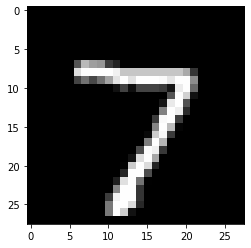

In [12]:
print("The label of this image is " + str(y_test[0]))

# plot the image
plotData = X_test[0]
plt.gray() 
plt.imshow(plotData)
plt.show()

In [13]:
import numpy as np
y_prob = cnn.predict(np.array([X_test[0]]))
classes = y_prob.argmax(axis=-1)

In [14]:
print(classes)

[7]


### Step #6. Get the Summary of the CNN Model 

In [15]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5